# Bangladash Agricultural Land Suitability Analysis Project

In [1]:
# Import neccessary libraries for initial analysis
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Initial Exploratory Data Analysis (EDA)
Visualizing data distributions for variables such as Fertility_Index, Season, and Temperature(°C). Analyze categorical variables like Soil_Type and Crop_Suitability.

In [2]:
# Initial reading of dataset
def initial_data():
    df = pd.read_csv('bangledesh_agriculture_data_cleaned.csv')
    return df
df = initial_data()

In [29]:
# Found averages of all numerical columns
general_averages = df[['Fertility_Index', 'Average_Rainfall_mm', 'Temperature_C']].mean()
print(general_averages)

Fertility_Index         70.10450
Average_Rainfall_mm    223.13600
Temperature_C           27.33025
dtype: float64


The analysis below shows us the realtionship between soil type and fertility. Showing that fertility is lowest with loamy soil type and highest with clay soil type

In [4]:
# Analyze Fertility Index Across Soil Types
soil_fertility = df.groupby('Soil_Type')['Fertility_Index'].mean().reset_index()
soil_fertility = soil_fertility.sort_values(by='Fertility_Index', ascending=False)
print(soil_fertility)

  Soil_Type  Fertility_Index
0      Clay        71.390306
3     Sandy        70.844059
4      Silt        70.161804
2     Peaty        69.830846
1     Loamy        68.423529


### Creating plots to help visualize data to get more insights.

The histogram below shows the distribution of rainfall values in the dataset with the average rainfall being 223 mm as stated in the table above and the frequency of rain hovering around 60.

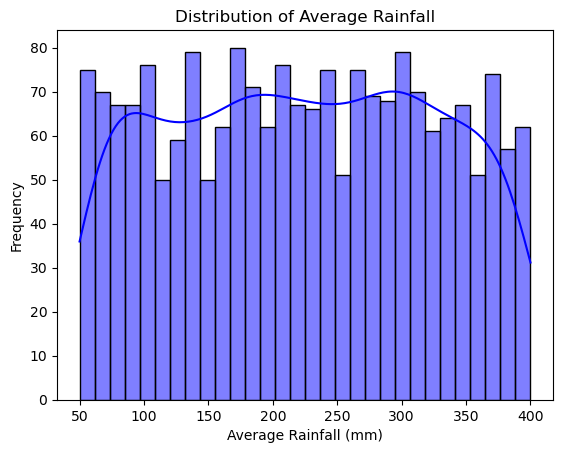

In [30]:
sns.histplot(df['Average_Rainfall_mm'], kde=True, color='blue', bins=30)
plt.title('Distribution of Average Rainfall')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

The heatmap below shows that the most fertile time to grow is during monsoon season in July and the least fertile time is Feburary during the summer.

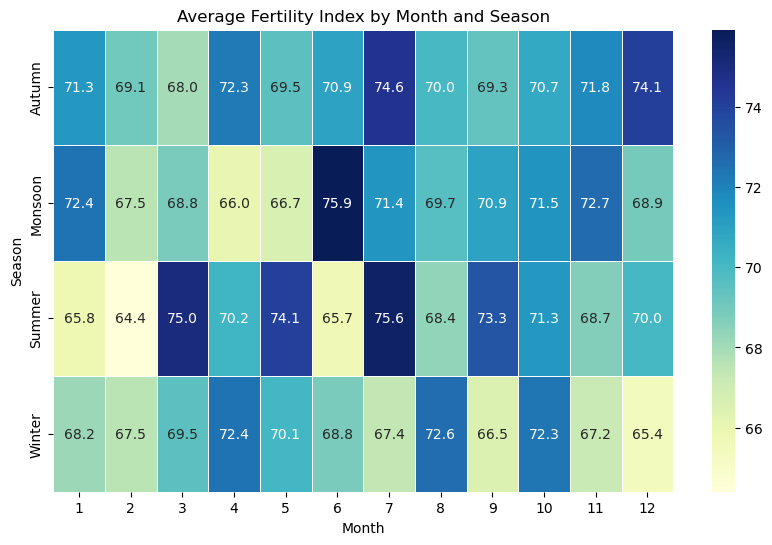

In [6]:
# Heatmap: Average Fertility Index by Month and Season
df['Satellite_Observation_Date_Converted'] = pd.to_datetime(df['Satellite_Observation_Date_Converted'])
month = df['Satellite_Observation_Date_Converted'].dt.month
seasonal_fertility = df.pivot_table(index='Season', columns=month, values='Fertility_Index', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_fertility, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Average Fertility Index by Month and Season')
plt.xlabel('Month')
plt.ylabel('Season')
plt.show()

The analysis below shows how rice is the best crop for winter, tea is the best crop for summer, spices is the crop for monsoon, and maize/rice are the best crops for Autumn.

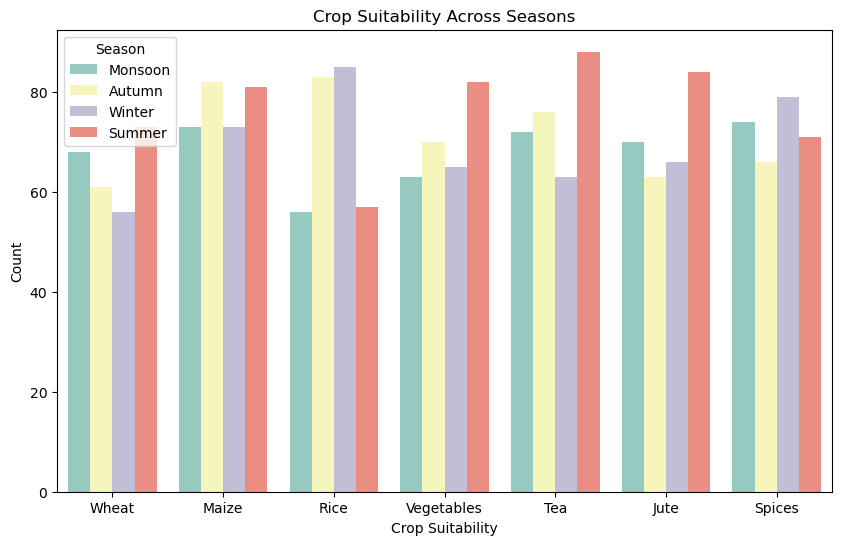

In [7]:
# Crop Suitability by Season
plt.figure(figsize=(10, 6))
sns.countplot(x='Crop_Suitability', hue='Season', data=df, palette='Set3')
plt.title('Crop Suitability Across Seasons')
plt.xlabel('Crop Suitability')
plt.ylabel('Count')
plt.legend(title='Season')
plt.show()

In the boxplot below, it shows that fertility index doesn't effect which crop is best for differing leves of fertility which can lead to the assumption that most crops can be planted no matter the level of fertility.

C:\Users\kahlo\AppData\Local\Temp\ipykernel_3128\2185479693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop_Suitability', y='Fertility_Index', data=df, palette='Set3')


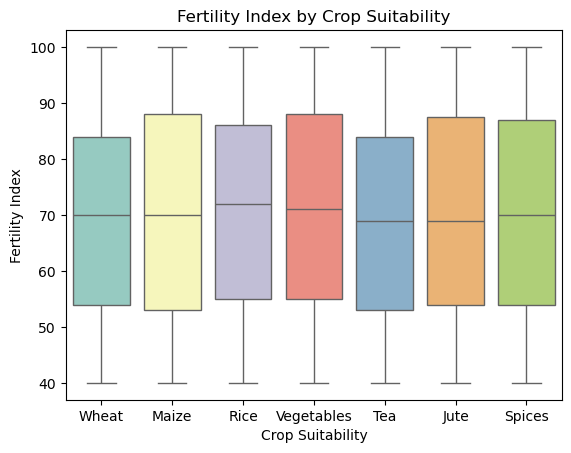

In [31]:
sns.boxplot(x='Crop_Suitability', y='Fertility_Index', data=df, palette='Set3')
plt.title('Fertility Index by Crop Suitability')
plt.xlabel('Crop Suitability')
plt.ylabel('Fertility Index')
plt.show()

The analysis highlights critical insights into agricultural land suitability. Clay soil type demonstrates the highest fertility, while loamy soil exhibits the lowest, guiding targeted soil management practices. Seasonal trends reveal optimal crop choices, such as rice for winter, tea for summer, spices for monsoon, and maize/rice for autumn, enabling season-specific agricultural planning. Despite fertility variations, crop suitability appears consistent, suggesting adaptability of crops across fertility levels. Additionally, monsoon season in July emerges as the most fertile growing period, emphasizing the importance of timing in maximizing yield potential. These findings provide actionable strategies for optimizing crop selection and resource allocation.



### Data Preppering/Cleaning for Machine Learning
Preparing the data to possibly predict Crop_Suitability using machine learning. Since Crop_Suitability is categorical, we need to convert it into numbers using Label Encoding.

In [20]:
# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
# Picking out neccessary data for model
data = df[['Soil_Type', 'Average_Rainfall_mm', 'Temperature_C', 'Crop_Suitability']].copy()
print(data.head())

# Encode Crop_Suitability
label_encoder = LabelEncoder()
data['Crop_Suitability'] = label_encoder.fit_transform(data['Crop_Suitability'])

# Check the mapping of categories to numbers
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# One-hot encode Soil_Type
data = pd.get_dummies(data, columns=['Soil_Type'], drop_first=True)

  Soil_Type  Average_Rainfall_mm  Temperature_C Crop_Suitability
0     Loamy                   72           28.6            Wheat
1     Sandy                  118           23.8            Maize
2     Peaty                  106           32.0            Maize
3     Sandy                  336           31.6            Wheat
4     Peaty                  237           20.1             Rice
{'Jute': 0, 'Maize': 1, 'Rice': 2, 'Spices': 3, 'Tea': 4, 'Vegetables': 5, 'Wheat': 6}
